<a href="https://colab.research.google.com/github/jakubdaron/MTR_optymalizacja/blob/main/Problem_RPQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[  0  37 276]
 [ 14   7 171]
 [ 78  24 253]
 [ 81  12  98]
 [155  49 142]
 [156  33 169]
 [171  28  73]
 [177  29  40]
 [190  33 297]
 [191   1 307]
 [208  24 167]
 [241  33 113]
 [242  49 111]
 [259  20 314]
 [262   7 179]
 [283   5 126]
 [291  14  19]
 [297  33 182]
 [316  21 334]
 [336   8 246]]
time: 0, current_task: 37, bufor_queue: []
time: 1, current_task: 36, bufor_queue: []
time: 2, current_task: 35, bufor_queue: []
time: 3, current_task: 34, bufor_queue: []
time: 4, current_task: 33, bufor_queue: []
time: 5, current_task: 32, bufor_queue: []
time: 6, current_task: 31, bufor_queue: []
time: 7, current_task: 30, bufor_queue: []
time: 8, current_task: 29, bufor_queue: []
time: 9, current_task: 28, bufor_queue: []
time: 10, current_task: 27, bufor_queue: []
time: 11, current_task: 26, bufor_queue: []
time: 12, current_task: 25, bufor_queue: []
time: 13, current_task: 24, bufor_queue: []
time: 14, current_task: 23, bufor_queue: [[14, 7, 171]]
time: 15, current_task: 22, bufor_que

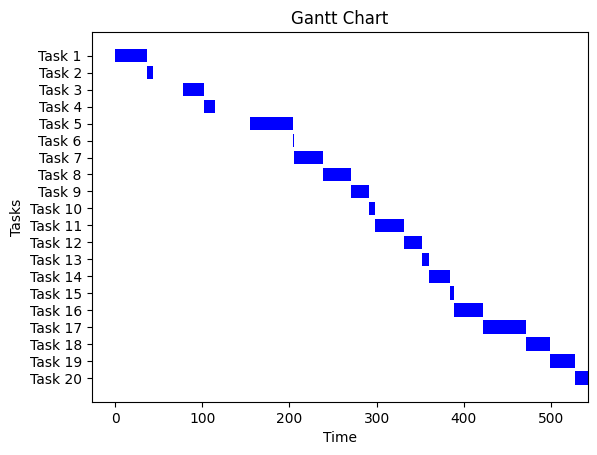

In [40]:
import random
import numpy as np
import matplotlib.pyplot as plt

def generate_sorted_rpq_table(n, F):
    rpq = []
    # generate random r, p, q values
    for i in range(n):
        r = random.randint(0, n*F)
        p = random.randint(1, 50)
        q = random.randint(0, n*F)
        rpq.append([r, p, q])

    # sort rpq table in increasing order of r values
    rpq = np.array(rpq)
    sorted_rpq = rpq[rpq[:, 0].argsort()]
    #sorted_rpq = np.array([[6, 4, 2], [6, 8, 3], [10, 2, 3], [12, 3, 0]])
    return sorted_rpq

def add_and_sort_bufor(sorted_rpq, iteration, bufor_queue):
    bufor = sorted_rpq[iteration].tolist()
    bufor_queue.append(bufor)
    bufor_queue = np.array(bufor_queue)

    # sort bufor_queue in decreasing order of q values
    sorted_bufor = bufor_queue[bufor_queue[:, 2].argsort()[::-1]]
    bufor_queue = sorted_bufor.tolist()
    return bufor_queue

def plot_gantt_chart(schedule):
    fig, ax = plt.subplots()
    tasks = [f'Task {i+1}' for i in range(len(schedule))]

    for i, task in enumerate(schedule):
        schedule[i][1], schedule[i][0] = task
        ax.barh(tasks[i], schedule[i][1] - schedule[i][0], left=schedule[i][0], color='blue')

    ax.set_xlabel('Time')
    ax.set_ylabel('Tasks')
    ax.set_title('Gantt Chart')
    ax.invert_yaxis()  # Invert the y-axis to have Task 1 at the top

    plt.show()

def optimise_function(sorted_rpq, n):

    schedule = []

    iteration = 0
    bufor_queue = []
    current_task = 0
    time = 0
    end_iteration = 0
    end_def = 0

    while end_def == 0:
        #print(current_task)
        if time == sorted_rpq[iteration, 0]:
            while True:
                bufor_queue = add_and_sort_bufor(sorted_rpq, iteration, bufor_queue)
                if iteration < n-1:
                    iteration += 1
                else:
                    end_iteration = 1

                if sorted_rpq[iteration, 0] != sorted_rpq[iteration-1, 0]:
                    break

        if current_task <= 0 and bufor_queue:
            current_task = bufor_queue[0][1]
            schedule.append([time, time+bufor_queue[0][1]])
            bufor_queue.pop(0)

        print(f"time: {time}, current_task: {current_task}, bufor_queue: {bufor_queue}")
        #print(f"time: {time}, current_task: {current_task}")
        time += 1
        current_task -= 1

        if end_iteration == 1:
            if current_task == 0 and len(bufor_queue) == 0:
                end_def = 1

    plot_gantt_chart(schedule)


if __name__ == "__main__":
    F = 17
    n = 20
    sorted_rpq = generate_sorted_rpq_table(n, F)
    print(sorted_rpq)
    optimise_function(sorted_rpq, n)
